In [ ]:
#The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. 
#The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import backend
import tensorflow as  tf

# Model architecture
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D, Activation, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
# 
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.constraints import maxnorm
# Data processing

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
# Progressor
#from tqdm import tqdm
#import h5py


In [101]:
# loading the dataset 
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [102]:
y_train[0:1]

array([[6]], dtype=uint8)

In [103]:
type(y_train)

numpy.ndarray

In [104]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X_train,y_train, test_size=0.2, random_state=1,stratify=y_train)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=y_train)

In [105]:
# splitting the data without strified sampling means each classes wont be equaly distributed 
#X_train1= X_train[:40000,:]
#X_test1 = X_train[-10000:,:]
#X_train1= X_train[:40000,:]
#X_test1 = X_train[-10000:,:]

In [106]:
# summarize loaded dataset
print('X_train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('X_train1: X=%s, y=%s' % (X_train1.shape, y_train1.shape))
print('X_test1: X=%s, y=%s' % (X_test1.shape, y_test1.shape))

X_train: X=(50000, 32, 32, 3), y=(50000, 1)
X_train1: X=(40000, 32, 32, 3), y=(40000, 1)
X_test1: X=(10000, 32, 32, 3), y=(10000, 1)


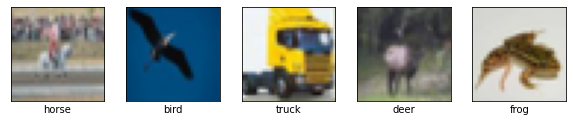

In [107]:
# few image trying to display from array of image and picture clarity etc.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train1[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train1[i][0]])
plt.show()

In [108]:
# checking if label are in number or in binary format.
y_test[0:2]

array([[3],
       [8]], dtype=uint8)

In [ ]:
# plot first few images
for i in range(5):
# define subplot
   plt.subplot(330 + 1 + i)
# plot raw pixel data
   plt.imshow(X_train1[i])
# show the figure
plt.show()

In [ ]:
# normalize pixel values
#X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0
# Function to reshape and scaling image
def Scale_Reshape(x):
    x_min = x.min(axis=(1, 2), keepdims=True)
    x_max = x.max(axis=(1, 2), keepdims=True)

    x = (x - x_min)/(x_max-x_min)
    
    x = x.reshape(-1, 32, 32, 3)
    return x

In [ ]:
# Training data processing
#X_train1_scale = Scale_Reshape(X_train1)

# Test data processing 
#X_test1_scale = Scale_Reshape(X_test1)
#  actual test data scaling
# Test data processing 
#X_test_scale = Scale_Reshape(X_test)

Text(0.5, 0, 'Classes')

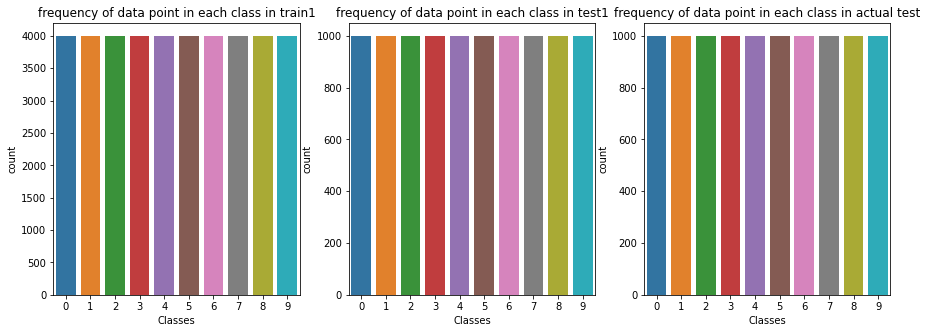

In [109]:
# Show the histogram showing the frequency of data point in each class
# it shows in training set each class having 5k images  and test each class having 1k 
fig, axs = plt.subplots(1,3,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train1.ravel(), ax=axs[0])
axs[0].set_title('frequency of data point in each class in train1')
axs[0].set_xlabel('Classes')

sns.countplot(y_test1.ravel(), ax=axs[1])
axs[1].set_title('frequency of data point in each class in test1')
axs[1].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[2])
axs[2].set_title('frequency of data point in each class in actual test')
axs[2].set_xlabel('Classes')

In [110]:
# normalize pixel values for validation dataset and train1 dataset
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')
X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0

In [111]:
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes)
y_test1 = tf.keras.utils.to_categorical(y_test1, num_classes)

In [112]:
# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_test = X_test.astype('float32')
X_test=  X_test / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [10]:
# plot loss and accuracy during training
# plot loss during training
def plotmodel(hist): 
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='Actual test dataset with augment')
    plt.legend()
# plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='Actual test dataset with augment')
    plt.legend()
    plt.show()

In [41]:
def plot_confusion_matrix(y_test_cat, predicted_classes, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test_cat, predicted_classes )
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [114]:
#net is learning with 32 convolutional filters, each of which with a 3 x 3 size. 
#activation is relu and we have a max-pooling operation with pool size 2 x 2 and a dropout at 20%.
# Add Dense layers on top
# CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs,drop out  and a softmax activation.
model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
 
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
#Compile and train the model  without any image augmentation
#opt = SGD(lr=0.01, momentum=0.9)
#optimizer=opt
model.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            loss = 'categorical_crossentropy',
            metrics=['accuracy'])

In [115]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_35 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_36 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)       

In [116]:
number_of_round=35 ,
#batch_size = 32
# saving the model before training ,so that next time rerun model ,i can start from here in stead of restart
model.save_weights('model.h5')

In [117]:
# training over the train dataset and doing validation against validation 0.1 

#history = model.fit(X_train1, y_train1, epochs = 40, shuffle = True, batch_size = 64,
#                    validation_data=(X_test1, y_test1))
history = model.fit(X_train1, y_train1, epochs = 20,shuffle = True, batch_size = 32,
                     validation_split = 0.1)

Epoch 1/20
1125/1125 [==============================] - 19s 17ms/step - loss: 1.6638 - accuracy: 0.3817 - val_loss: 1.3801 - val_accuracy: 0.5002
Epoch 2/20
1125/1125 [==============================] - 18s 16ms/step - loss: 1.2438 - accuracy: 0.5519 - val_loss: 1.1397 - val_accuracy: 0.6015
Epoch 3/20
1125/1125 [==============================] - 18s 16ms/step - loss: 1.0595 - accuracy: 0.6201 - val_loss: 0.9793 - val_accuracy: 0.6560
Epoch 4/20
1125/1125 [==============================] - 18s 16ms/step - loss: 0.9304 - accuracy: 0.6678 - val_loss: 0.8988 - val_accuracy: 0.6858
Epoch 5/20
1125/1125 [==============================] - 18s 16ms/step - loss: 0.8488 - accuracy: 0.6991 - val_loss: 0.8434 - val_accuracy: 0.6950
Epoch 6/20
1125/1125 [==============================] - 18s 16ms/step - loss: 0.7789 - accuracy: 0.7242 - val_loss: 0.8207 - val_accuracy: 0.7130
Epoch 7/20
1125/1125 [==============================] - 18s 16ms/step - loss: 0.7284 - accuracy: 0.7434 - val_loss: 0.7543 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


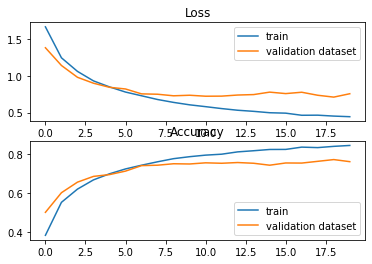

In [118]:
# printing , below graph shows loss and accuracy for train and validation dataset 
print(history.history.keys())

plotmodel(history)

In [119]:
model.load_weights('model.h5')

In [120]:
# with test1 dataset 

history = model.fit(X_train1, y_train1, epochs = 20, shuffle = True, batch_size = 32,
                   validation_data=(X_test1, y_test1))

Epoch 1/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.8248 - accuracy: 0.3233 - val_loss: 1.5040 - val_accuracy: 0.4516
Epoch 2/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.3909 - accuracy: 0.4945 - val_loss: 1.2741 - val_accuracy: 0.5306
Epoch 3/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.1782 - accuracy: 0.5756 - val_loss: 1.0428 - val_accuracy: 0.6259
Epoch 4/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.0176 - accuracy: 0.6397 - val_loss: 0.9680 - val_accuracy: 0.6594
Epoch 5/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.9024 - accuracy: 0.6802 - val_loss: 0.8804 - val_accuracy: 0.6934
Epoch 6/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8177 - accuracy: 0.7129 - val_loss: 0.8353 - val_accuracy: 0.7095
Epoch 7/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.7475 - accuracy: 0.7358 - val_loss: 0.7815 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


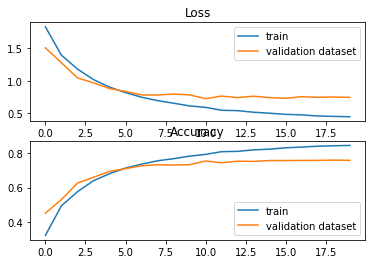

In [121]:
# printing , below graph shows loss and accuracy for train and test1 dataset 
print(history.history.keys())

plotmodel(history)

In [123]:
# Evaluate the model
test_loss1, test_acc1 = model.evaluate(X_test1,  y_test1, verbose=2)

313/313 - 2s - loss: 0.7445 - accuracy: 0.7575


In [127]:
#after training, "reset" the model by reloading the initial weights:
model.load_weights('model.h5')

In [128]:
# with actual test dataset 

history = model.fit(X_train1, y_train1, epochs = 20, shuffle = True, batch_size = 32,
                   validation_data=(X_test, y_test))

Epoch 1/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.7720 - accuracy: 0.3385 - val_loss: 1.4497 - val_accuracy: 0.4698
Epoch 2/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.3392 - accuracy: 0.5122 - val_loss: 1.2009 - val_accuracy: 0.5633
Epoch 3/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.1067 - accuracy: 0.6045 - val_loss: 1.0315 - val_accuracy: 0.6312
Epoch 4/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.9600 - accuracy: 0.6575 - val_loss: 0.9356 - val_accuracy: 0.6699
Epoch 5/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8588 - accuracy: 0.6956 - val_loss: 0.8383 - val_accuracy: 0.7072
Epoch 6/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.7724 - accuracy: 0.7276 - val_loss: 0.8218 - val_accuracy: 0.7079
Epoch 7/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.7161 - accuracy: 0.7486 - val_loss: 0.8270 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


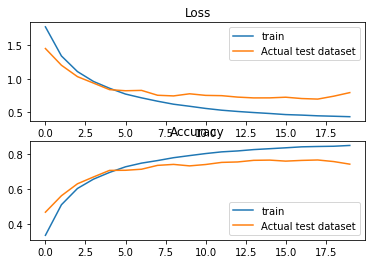

In [132]:
# printing , below graph shows loss and accuracy for train and test dataset 
print(history.history.keys())

plotmodel(history)

In [133]:
# Evaluate the model
test_loss1, test_acc1 = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.7940 - accuracy: 0.7427


In [134]:
# Evaluate the model for test data

predicted_classes = model.predict_classes(X_test) 
predicted_classes


array([3, 8, 8, ..., 5, 1, 7])

In [135]:
y_test[0:2]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [136]:
# basically it is in binary fromat ,so converting to numeric 
y_test_cat1 = y_test_cat.argmax(1)

In [137]:
y_test_cat1

array([3, 8, 8, ..., 5, 1, 7])

In [139]:
# confusion matrix for all the 10 classes 
confusion_matrix(y_test_cat1, predicted_classes, labels=[0,1,2,3,4,5,6,7,8,9])

array([[884,  10,  22,  13,   3,   5,   5,   4,  43,  11],
       [ 37, 849,   2,  10,   1,   3,   4,   2,  26,  66],
       [134,   0, 650,  60,  50,  41,  30,  16,  16,   3],
       [ 66,   6,  76, 587,  32, 117,  56,  29,  21,  10],
       [ 76,   2,  81,  73, 642,  43,  27,  44,   7,   5],
       [ 37,   2,  53, 188,  23, 623,  22,  39,   6,   7],
       [ 32,  11,  75,  67,  31,  13, 730,   6,  28,   7],
       [ 37,   2,  27,  50,  44,  55,   1, 770,   5,   9],
       [ 88,  10,   7,   8,   3,   2,   3,   0, 864,  15],
       [ 56,  54,   6,  10,   2,   3,   3,  10,  28, 828]])

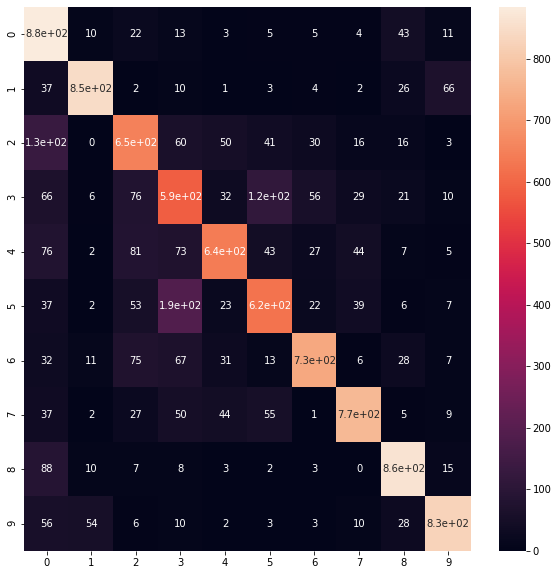

In [140]:
cm = confusion_matrix(y_test_cat1, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
#before going for image augmentation , again retraining the madel with its intial value 

In [19]:
# loading the dataset 
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_test = X_test.astype('float32')
X_test=  X_test / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_train = X_train.astype('float32')
X_train =  X_train / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
 
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
#Compile and train the model  without any image augmentation
#opt = SGD(lr=0.01, momentum=0.9)
#optimizer=opt
model.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            loss = 'categorical_crossentropy',
            metrics=['accuracy'])
model.save_weights('model.h5')



In [ ]:
# MODEL Training using data augmentaion 

In [20]:
# generating more data using the existing data
#Randomly Zoom by 10% some training images
#Randomly shift images horizontally by 10% of the width
#Randomly shift images vertically by 10% of the height
#Randomly flip images horizontally.
#from tf.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zca_epsilon=0,
                            #width_shift_range = 0.1,
                            horizontal_flip = True,
                            fill_mode='reflect',
                            )
  

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)       

In [22]:
# retraining the model with image genearator

#
# get batch iterator for training
train_iterator = datagen.flow(X_train, y_train)
# get batch iterator for test
test_iterator = datagen.flow(X_test, y_test)
# fit model
history = model.fit_generator(train_iterator, validation_data=test_iterator, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6064 - accuracy: 0.4073 - val_loss: 1.2742 - val_accuracy: 0.5343
Epoch 2/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1599 - accuracy: 0.5831 - val_loss: 1.0001 - val_accuracy: 0.6514
Epoch 3/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9794 - accuracy: 0.6552 - val_loss: 0.8919 - val_accuracy: 0.6825
Epoch 4/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8807 - accuracy: 0.6898 - val_loss: 0.8500 - val_accuracy: 0.7078
Epoch 5/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8153 - accuracy: 0.7128 - val_loss: 0.7931 - val_accuracy: 0.7317
Epoch 6/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7715 - accuracy: 0.7307 - val_loss: 0.7210 - val_accuracy: 0.7490
Epoch 7/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7351 - accuracy: 0.7438 - val_loss: 0.7008 -

In [23]:
# Evaluate the model for test data

# evaluate model loss on test dataset
test_loss, test_acc = model.evaluate_generator(test_iterator, verbose=2)

313/313 - 2s - loss: 0.6000 - accuracy: 0.8006


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


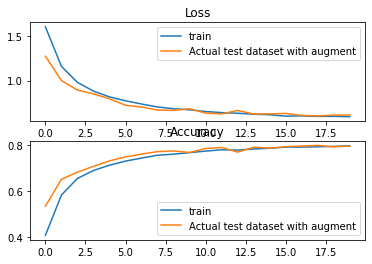

In [24]:
# printing , below graph shows overfitting train accuracy good but test accuracy down ,difference is there 
print(history.history.keys())
plotmodel(history)

In [25]:
# Evaluate the model for test data

predicted_classes = model.predict_classes(X_test) 
predicted_classes


array([3, 8, 8, ..., 5, 1, 7])

In [26]:
y_test[0:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [27]:
# basically it is in binary fromat ,so converting to numeric 
y_test_cat = y_test.argmax(1)

In [28]:
y_test_cat[0:2]

array([3, 8])

In [29]:
 # reshaping the pred array to same as actual test array 
# predicted_classes1 = predicted_classes.reshape(predicted_classes.shape[0],-1)
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Confusion matrix, without normalization


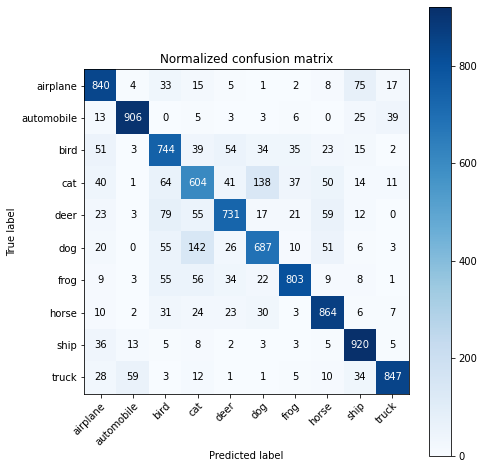

In [42]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_cat, predicted_classes, classes=class_names,
                      title='Normalized confusion matrix')